In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import islice, cycle
import warnings

# Import clustering methods
from sklearn.cluster import AffinityPropagation, SpectralClustering, KMeans
from sklearn.mixture import GaussianMixture
from hdbscan import HDBSCAN

from umap.umap_ import nearest_neighbors
# from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

import numpy as np

import pickle


In [105]:
transfrm_data = pickle.load( open('../models/data/umap_data.p', "rb") )
umap_data = pickle.load( open('../models/data/umap_data.p', "rb") )
pca_data = pickle.load( open('../models/data/pca_data.p', "rb") )

In [ ]:
column_names = transfrm_data[0]
pl_data = transfrm_data[1]

Try different clustering methods: KNN, Affinity Propagation, Gaussian Mixture. 

From the UMAP plot, we sort of know there's going to be between 10-15 clusters, so let's see which makes most sense

#### Pt I: K Nearest-Neighbours

In [ ]:
# This is in the other notebook (save elsewhere?)
# Function to visualize embeddings in 2-dimensions

# This will change to include the clusters we've decided on
def draw_umap(data, n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data)
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c = color)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c = color )
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], s=100, c = color)
        
    plt.title(title, fontsize=18)
    return u

In [ ]:
distortions = []
    
print(f"For n_clusters = any, the best silhouette_score is : 1; the best Davies-Bouldin score is : 0; a good Calinski-Harabsz score is 1000.")
for k in K:
    
    kmeanModel.fit(pca_data)
    cluster_labels = kmeanModel.fit_predict(pca_data)
    distortions.append(kmeanModel.inertia_)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters. Score ranges from -1 to 1, with 1 being best and -1 being worst.
    silhouette_avg = silhouette_score(pca_data, cluster_labels)
    
    # The Davies-Bouldin score shows clusters that are farther apart and less dispersed
    # Lower scores are better with 0 being best score
    db_score = davies_bouldin_score(pca_data, cluster_labels)
    
    # The Calinsi-Harabsz gives the ratio of between-cluster dispersion and within-cluster dispersion (...kind of).
    # The score is higher when clusters are well-separated (numerator) and dense (denominator)
    # So high scores are better.
    ch_score = calinski_harabasz_score(pca_data, cluster_labels)


    print(f"For n_clusters = {k}, the average silhouette_score is : {silhouette_avg:.2f}; the Davies-Bouldin score is : {db_score:.2f}; the Calinski-Harabsz score is {ch_score:.2f}.")

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
print(len(range(10,15)))

Below borrowed heavily from [here](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html), and [here](https://hdbscan.readthedocs.io/en/latest/advanced_hdbscan.html)

In [ ]:

# cluster params
orig_params = {
    "damping": 0.9,
    "preference": -200,
    "n_clusters": 10,
    "min_samples": 10
}

# Initialize clustering algorithms     
kmean = KMeans(
    n_clusters = orig_params['n_clusters']
    )
    
spectral = SpectralClustering(
    n_clusters= orig_params["n_clusters"],
    eigen_solver="arpack",
    affinity="nearest_neighbors",
)
affinity_propagation = AffinityPropagation(
    damping= orig_params["damping"], preference=orig_params["preference"], random_state=0
)

hdb_labels = HDBSCAN(
    min_samples=orig_params['min_samples'],
    min_cluster_size=20,
)

gmm = GaussianMixture(
    n_components=orig_params["n_clusters"], covariance_type="full"
)

clustering_algorithms = (
("KMeans", kmean),
("Spectral\nClustering", spectral),
("Affinity\nPropagation", affinity_propagation),
("HDBSCAN", hdb_labels),
("Gaussian\nMixture", gmm),
)


cluster_range = range(13,18)
for name, algorithm in clustering_algorithms:

    plt.figure(figsize=(9 * 2 + 3, 13))
    plot_num = 1

    for num_clust in cluster_range:
        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
        n_clusters = {"n_clusters": num_clust}
        params = orig_params.copy()
        params.update(n_clusters)

        clusters = algorithm.fit_predict(umap_data)

        
        silhouette_avg = silhouette_score(umap_data, clusters)
        db_score = davies_bouldin_score(umap_data, clusters)
        ch_score = calinski_harabasz_score(umap_data, clusters)


        ### Might work for HDBSCAN<?
        # color_palette = sns.color_palette('deep', 8)
        # cluster_colors = [color_palette[x] if x >= 0
        #           else (0.5, 0.5, 0.5)
        #           for x in clusterer.labels_]
        # cluster_member_colors = [sns.desaturate(x, p) for x, p in
        #                  zip(cluster_colors, clusterer.probabilities_)]
        # plt.scatter(*data.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)
        colors = np.array(
        list(
            islice(
                cycle(
                    [
                        "#FF3333",
                        "#ff9933",
                        "#ffff33",
                        "#32d927",
                        "#35e8b2",
                        "#984ea3",
                        "#35d2e8",
                        "#2237e8",
                        "#9915e9",
                        "#ea36e6",
                        "#e43582",
                        "#ff5b5d",
                        "#717480",
                        "#66866d",
                        "#99ffcc",
                        "#ff66ff",
                        "#404040",
                    ]
                    ),
                int(max(clusters) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.subplot(len(clustering_algorithms), len(cluster_range), plot_num)
        plt.scatter(umap_data[:, 0], umap_data[:, 1], s=10, color=colors[clusters])

        plt.title(f"{name}\n{num_clust} clusters")
        plt.xlim(-2, 14)
        plt.ylim(1.5, 9.5)
        plt.xticks(())
        plt.yticks(())
        plt.xlabel(f"Silhouette ={silhouette_avg:.2f}\nDavies-Bouldin = {db_score:.2f}\nCalinski-Harabasz = {ch_score:.2f}")
        plot_num += 1
    plt.show()

In [ ]:
# If we use Gaussian mixture, look at AIC/BIC.
n_components = np.arange(5, 25)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(umap_data) for n in n_components]
plt.plot(n_components, [m.bic(umap_data) for m in models], label='BIC')
plt.plot(n_components, [m.aic(umap_data) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.show()

BIC starts to elbow around 14, so stick with 14 clusters, Gaussian mixture. Have to figure out what they mean though.

Need to be able to match player names to clusters and actually figure out what they do

In [106]:
# Finalize model
gmm = GaussianMixture(
    n_components=14, 
    covariance_type="full", 
    random_state = 4
    )


clusters = gmm.fit_predict(umap_data)
pickle.dump(clusters, open('../models/clusters/gmm_cluster.p', "wb") )

In [ ]:
gmm.predict_proba(umap_data)[10]

In [107]:
# Find number of elements in each cluster
unique, counts = np.unique(clusters, return_counts=True)

dict(zip(unique, counts))

{0: 145,
 1: 146,
 2: 190,
 3: 188,
 4: 70,
 5: 133,
 6: 148,
 7: 208,
 8: 261,
 9: 56,
 10: 209,
 11: 106,
 12: 261,
 13: 46}

To understand what clusters means, do the following:
- Find players who are at centre of clusters (mean?)
- Look at their percentile rank for each stat
- Identify role based on that
- Calculate similarity to nearest neighbor player (need metric for that)

#### Figure out what the clusters are

Find which players belong to which clusters, then groupby the percentile ranks of those players, see what they're good and not so good at

In [108]:
data = pd.read_csv("../data/processed/sb_individual.csv")

In [109]:
# Add identified cluster to umap coordinates
cluster_list = []
for element in range(len(umap_data)):
    clust = np.append(umap_data[element], clusters[element])
    cluster_list.append(clust)
    cluster_data = pd.DataFrame(cluster_list, columns = ["Component 1", "Component 2", "Cluster"]) # Make a dataframe so we can group by cluster

In [110]:
cluster_pctl = data.iloc[:, 8:].rank(pct=True)
cluster_pctl["Player Type"] = clusters 
# Drop stats that didn't contribute (mainly goal/assist stats)
cluster_pctl.drop(columns = ["SoT%", "SoT/90", "Sh/90", 'Gls/90', 'G/Sh', 'G/SoT', 'np:G-xG', 'Ast',
          'xA', 'A-xA',  'GCPass/90', 'GCDrib/90', 'onG', 'onGA', '+/-',
           'On-Off', 'onxG', 'onxGA', 'xG+/-', 'onG-xG', 'onGA-xGA', 'G-xG+/-'], inplace=True)

cluster_pctl.iloc[:, :]

,AvgShotDist,npxG/90,npxG/Sh,TotDist/pass,PrgDist/Pass,Short%,Med%,Long%,PropShort,PropMed,...,Clr,Fls,Fld,TimesOffside,PKwon,PKcon,Recov,DuelWin%,AerialDuels,Player Type
0,0.831564,0.408399,0.479003,0.778957,0.862021,0.913706,0.541071,0.414859,0.227042,0.616290,...,0.470235,0.845870,0.761883,0.168897,0.414629,0.872174,0.675588,0.483156,0.479003,3
1,0.695431,0.061144,0.120674,0.535302,0.980157,0.244808,0.227734,0.077527,0.332718,0.776650,...,0.724504,0.574988,0.761421,0.458929,0.414629,0.867559,0.598523,0.469774,0.732349,3
2,0.216890,0.050300,0.298569,0.941394,0.693586,0.549608,0.741347,0.725658,0.047070,0.870328,...,0.907245,0.023073,0.173050,0.367097,0.414629,0.387402,0.775265,0.786571,0.778034,7
3,0.661514,0.120904,0.120674,0.571758,0.835718,0.347716,0.342640,0.176742,0.353484,0.682049,...,0.744808,0.332257,0.724504,0.570605,0.414629,0.841255,0.796724,0.660129,0.701431,3
4,0.825104,0.396862,0.479003,0.550992,0.611906,0.996308,0.956853,0.862944,0.479003,0.750808,...,0.704199,0.147670,0.070143,0.500000,0.414629,0.387402,0.288417,0.557683,0.144901,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162,0.946931,0.095524,0.053992,0.317490,0.696354,0.864559,0.623212,0.142824,0.554684,0.651592,...,0.552377,0.054915,0.259345,0.528150,0.414629,0.387402,0.220581,0.307568,0.218043,12
2163,0.898246,0.752653,0.203738,0.760960,0.694047,0.184126,0.377480,0.287956,0.362713,0.183203,...,0.033687,0.352100,0.976465,0.618828,0.414629,0.387402,0.181357,0.053992,0.246885,11
2164,0.056299,0.591601,0.632672,0.975542,0.959852,0.714582,0.824181,0.778034,0.030457,0.931703,...,0.940471,0.247347,0.174896,0.373789,0.414629,0.801108,0.666820,0.938163,0.940932,1
2165,0.107522,0.163359,0.298569,0.937240,0.746193,0.874712,0.757499,0.683895,0.052607,0.942317,...,0.882326,0.106138,0.294878,0.168897,0.414629,0.387402,0.441163,0.640748,0.676973,13


In [221]:
# Do grouping to see percentiles
cluster_avg = cluster_pctl.groupby("Player Type").mean()
cluster_avg

,AvgShotDist,npxG/90,npxG/Sh,TotDist/pass,PrgDist/Pass,Short%,Med%,Long%,PropShort,PropMed,...,Int,Clr,Fls,Fld,TimesOffside,PKwon,PKcon,Recov,DuelWin%,AerialDuels
Player Type,,,,,,,,,,,,,,,,,,,,,
0,0.680219,0.323363,0.324999,0.591534,0.386277,0.608117,0.687731,0.743370,0.437049,0.647214,...,0.683647,0.579902,0.750798,0.489187,0.276226,0.437525,0.605073,0.812108,0.673553,0.480742
1,0.172758,0.330891,0.572657,0.874541,0.780762,0.689609,0.823645,0.682708,0.109245,0.874527,...,0.707499,0.902019,0.353660,0.207965,0.317929,0.434370,0.889831,0.651088,0.814632,0.711087
2,0.367694,0.876463,0.775157,0.188355,0.173621,0.212246,0.205375,0.409662,0.823540,0.168567,...,0.154962,0.212585,0.540410,0.688077,0.860639,0.926047,0.425695,0.122664,0.283878,0.634821
3,0.629874,0.266193,0.316175,0.505452,0.741544,0.555015,0.431590,0.310276,0.438835,0.596874,...,0.719688,0.673007,0.468844,0.428735,0.407866,0.485544,0.729683,0.579166,0.587512,0.437877
4,0.653369,0.667806,0.480754,0.436538,0.528004,0.442165,0.378370,0.372052,0.589317,0.317513,...,0.345306,0.232520,0.407960,0.653909,0.605913,0.571046,0.512559,0.427978,0.274392,0.244370
5,0.260304,0.897827,0.824398,0.102500,0.074980,0.155856,0.182240,0.508934,0.893845,0.142623,...,0.082443,0.279989,0.546388,0.587500,0.884395,0.430436,0.398996,0.071694,0.333452,0.826393
6,0.661785,0.568063,0.473550,0.502437,0.403259,0.533028,0.554087,0.557303,0.546031,0.422082,...,0.471035,0.331384,0.654397,0.682713,0.422520,0.532819,0.439248,0.596503,0.370036,0.321367
7,0.199892,0.340601,0.550135,0.852973,0.754517,0.706296,0.810519,0.697522,0.133650,0.872660,...,0.714070,0.877127,0.334417,0.207685,0.331511,0.442994,0.387402,0.706433,0.813383,0.715490
8,0.502559,0.746464,0.631091,0.252662,0.270389,0.335177,0.317985,0.367087,0.753657,0.230653,...,0.293385,0.220754,0.542200,0.629438,0.696898,0.416820,0.420722,0.289357,0.244716,0.467802


In [306]:
# For each cluster, find areas where they are good, and not so good
all_skills = []
for index, row in cluster_avg.iterrows():
        cluster_skills = []
        cluster_best_skills = row.loc[lambda x: x > 0.75]
        cluster_skills.append(cluster_best_skills)
        cluster_worst_skills = row.loc[lambda x: x < 0.3]## (need to find )]
        cluster_skills.append(cluster_worst_skills)

        all_skills.append(cluster_skills) # All skills contains both best and worst skills


In [302]:
df = pd.DataFrame(cluster_avg, index = [0])
df.iloc[:, [0,2]].values

array([[0.68021896, 0.32499881]])

In [307]:
# We're gonna do this for each cluster then, huh...

# plt.style.use('fivethirtyeight')
# sns.set_palette("bwr")
# sns.set(style="whitegrid", color_codes=True)
def playstyle_plots(cluster_num, data, high_pctl, low_pctl):
    '''Plot some exploratory information on each cluster
    Parametrs:
        cluster_num: number of cluster to consider
        df: dataframe to consider, as dataframe'''
    df = pd.DataFrame(data, index=[cluster_num])
    
    ### Only show xticklabels of values above and below the threshold 
    # Get names of good and not so good skills
    good_skills = all_skills[cluster_num][0].index.tolist()
    notso_good_skills = all_skills[cluster_num][1].index.tolist()

    # If one of them is empty, don't append
    if not good_skills: 
        skills_total = notso_good_skills
    if not notso_good_skills :
        skills_total = good_skills
    else:
        skills_total = good_skills
        skills_total.extend(notso_good_skills)
    skills_total_idx = [cluster_avg.columns.get_loc(col) for col in skills_total]
    
    vals = df.values[0]
    pal = sns.color_palette("rainbow", len(vals))
    # rank = 
    # Can use below to rank individual one; if we want same colors for all plots, use above
    rank = vals.argsort().argsort()  # http://stackoverflow.com/a/6266510/1628638
    
    ax = sns.barplot(x=df.columns, y=vals, palette=np.array(pal[::-1])[rank])
    # ax = sns.barplot(x=df.columns, y=vals, palette=pal)
    ax.set_xticks(skills_total_idx)
    ax.set_xticklabels(labels = skills_total,
                        rotation = 90, 
                        horizontalalignment = 'center') # Labels to use
    ax.axhline(y = high_pctl, ls = '-')
    ax.axhline(y = low_pctl, ls = '-')
    plt.xticks(fontsize = 8)

    labels = ax.get_xticklabels()
    skill_vals = df.iloc[:, skills_total_idx].values[0]
    for label, val in zip(labels, skill_vals):
        if val < low_pctl:
            label.set_color('r')
        if val > high_pctl:
            label.set_color('indigo')
    plt.title(f'Percentile Skill Ranks for Cluster {cluster_num+1}')
    plt.show()

    values = df.values.flatten()
    sns.histplot(values)
    plt.title(f'Histogram of Percentiles for Cluster {cluster_num+1}')
    plt.show()

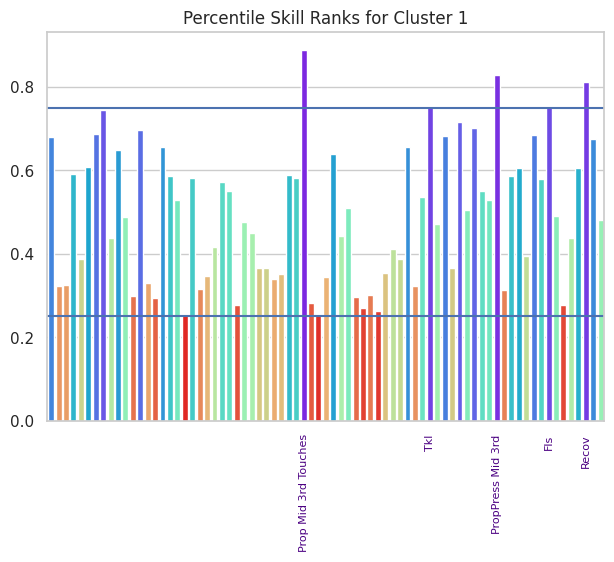

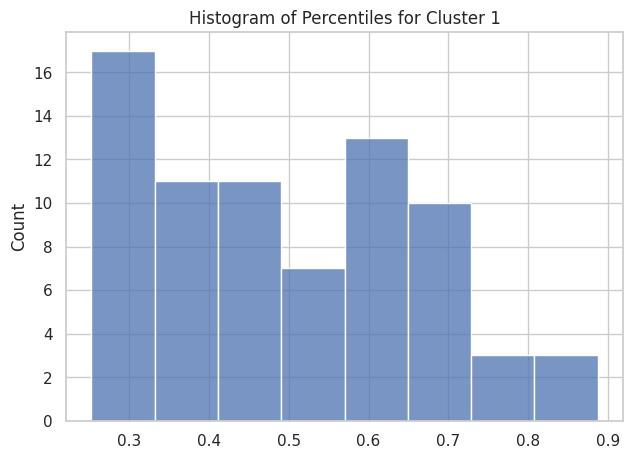

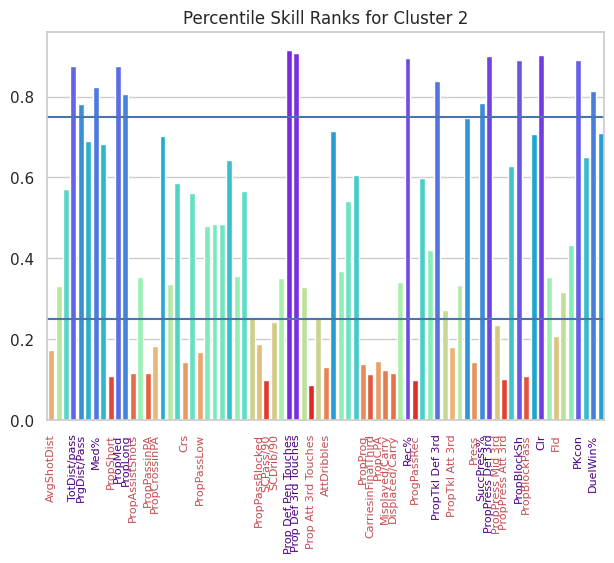

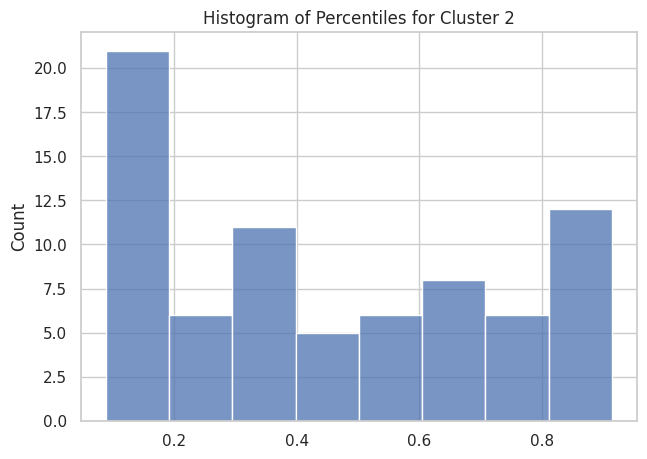

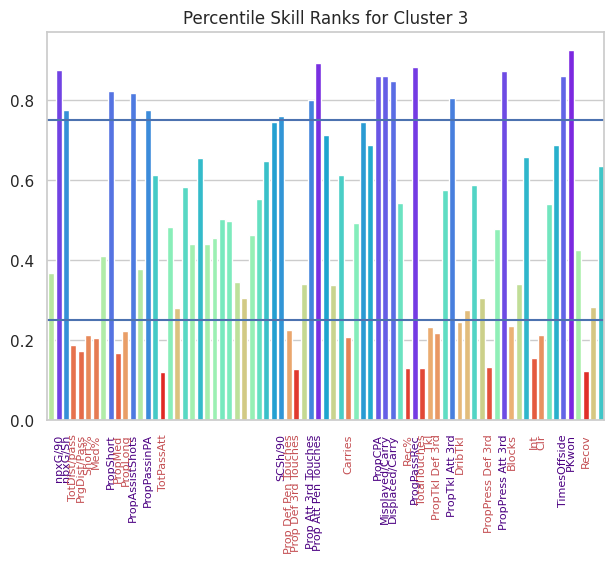

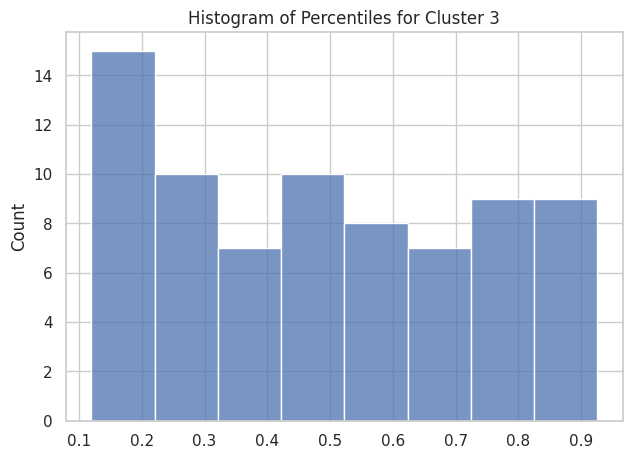

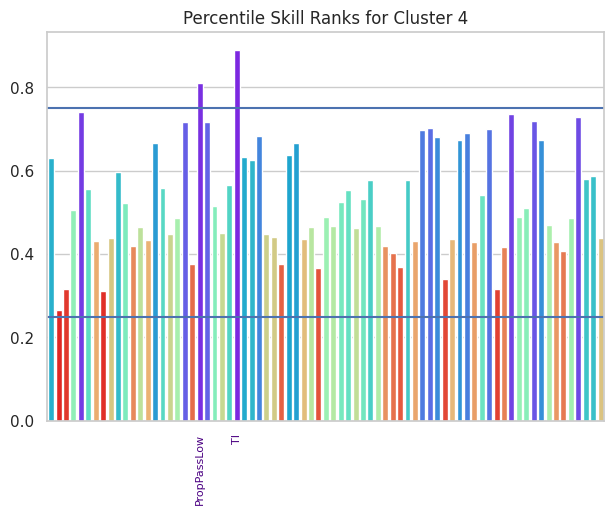

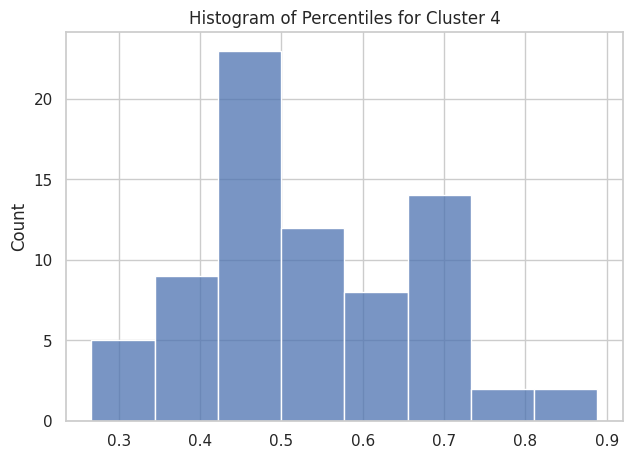

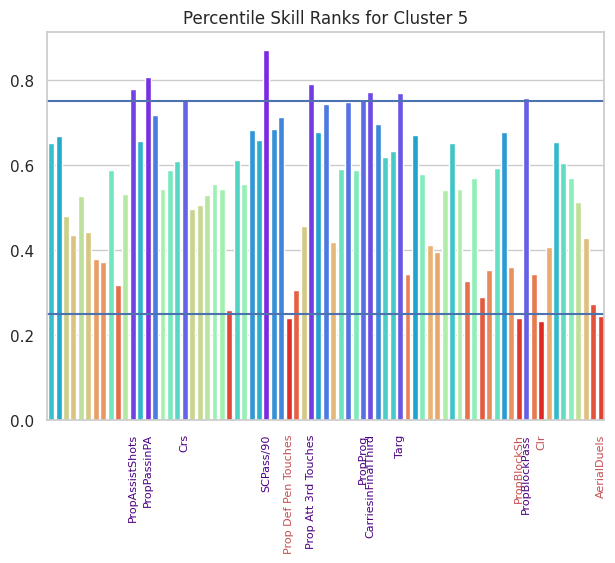

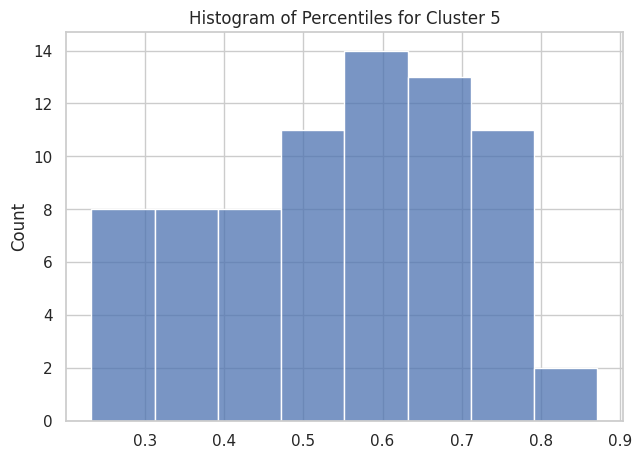

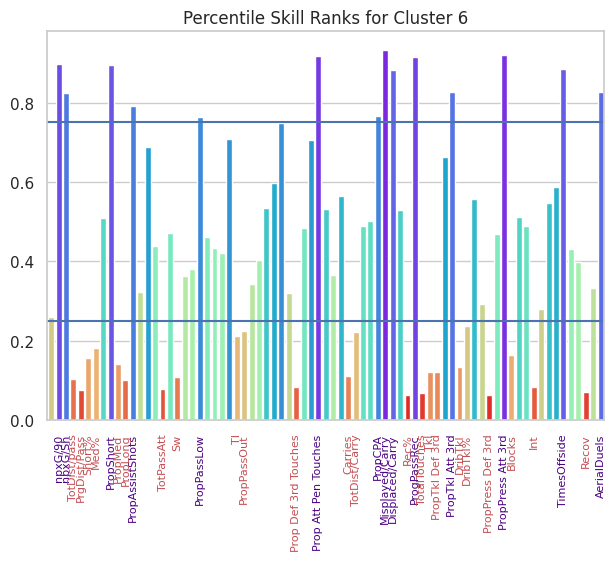

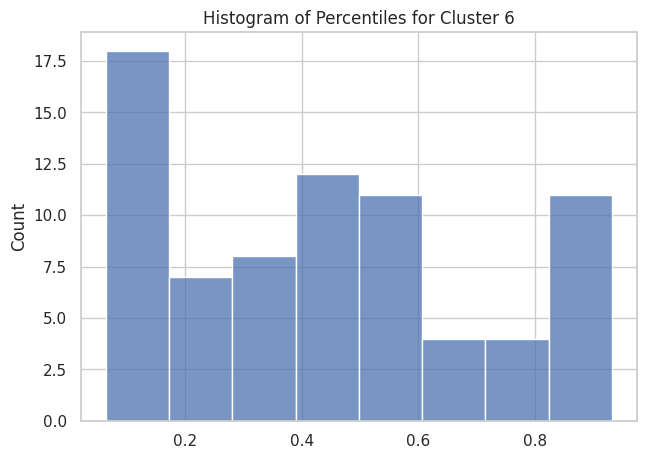

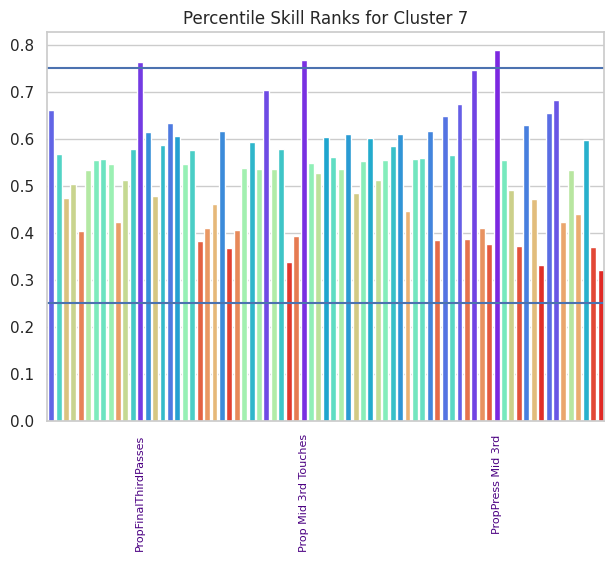

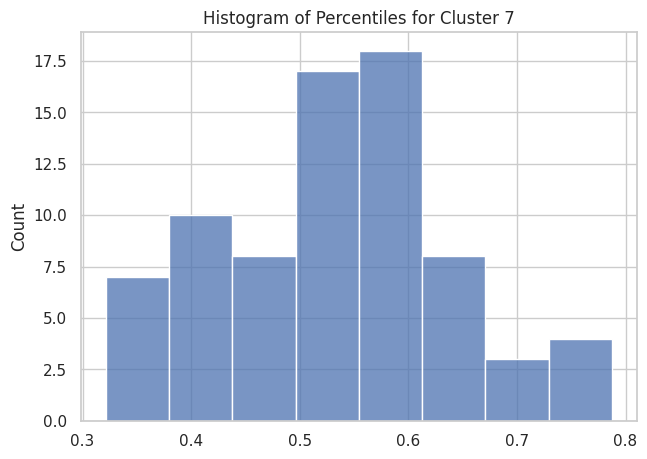

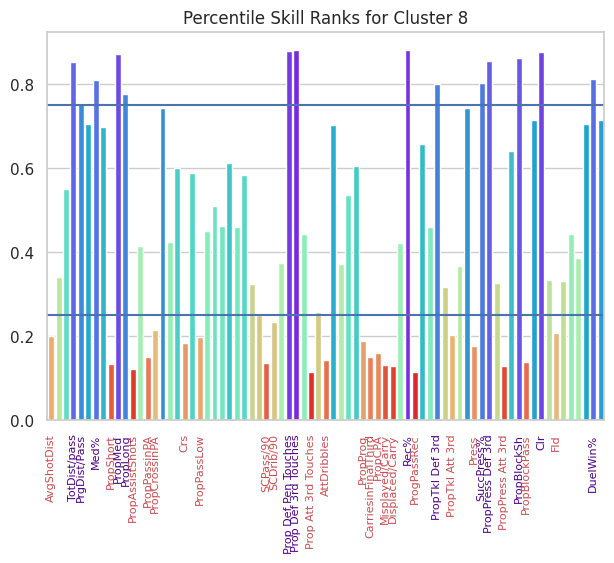

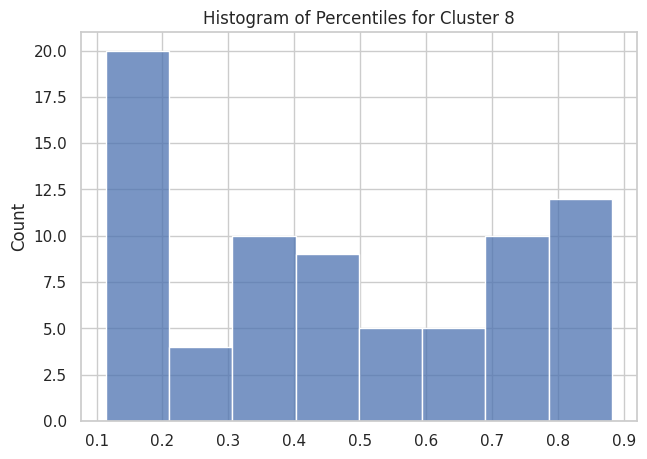

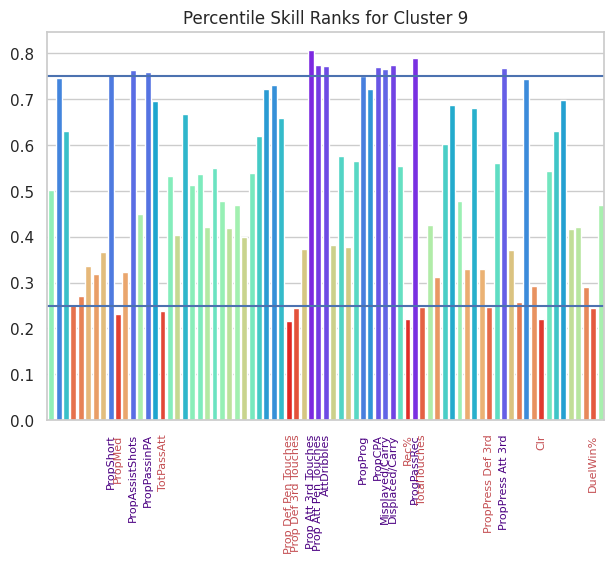

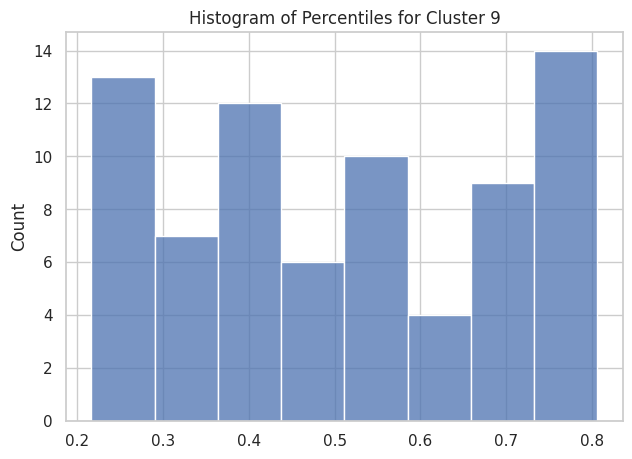

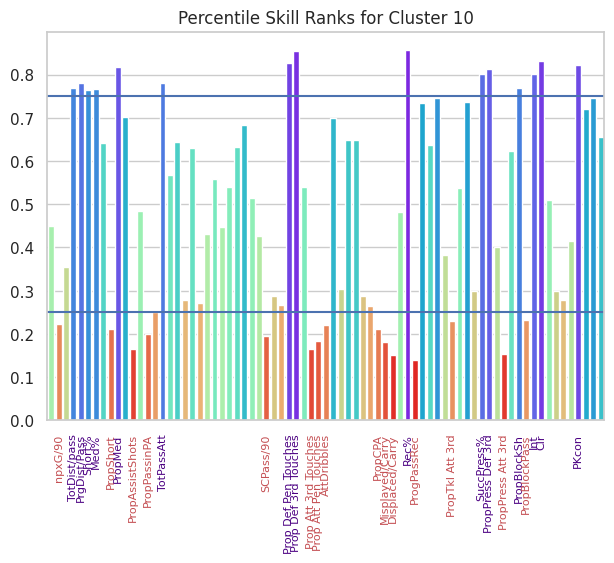

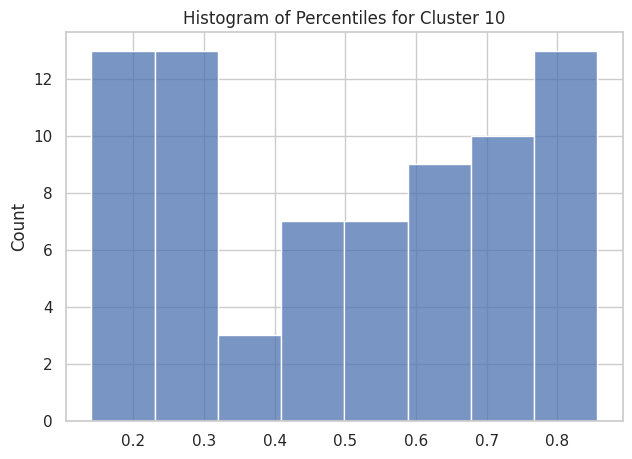

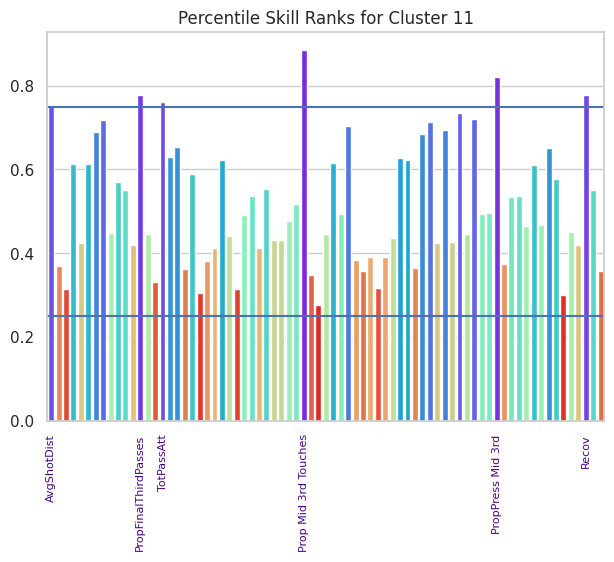

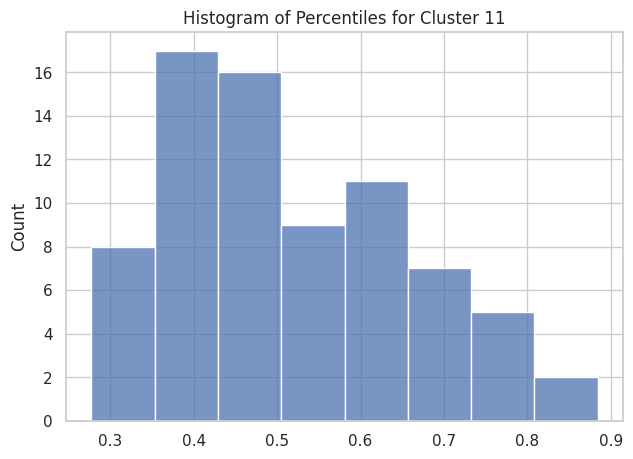

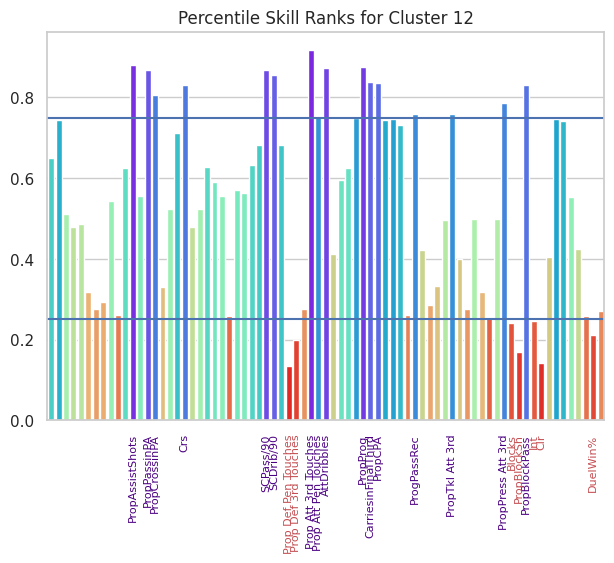

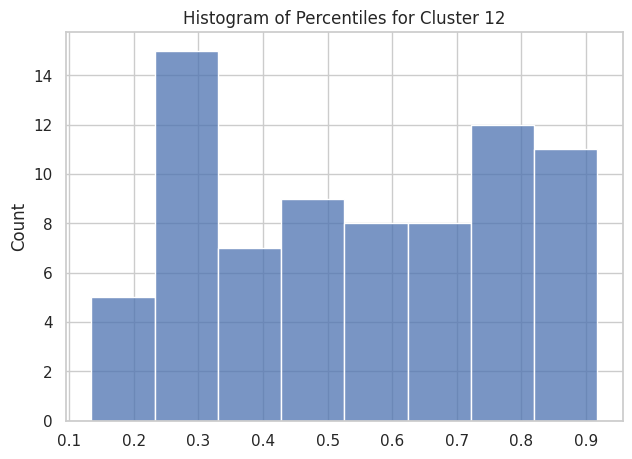

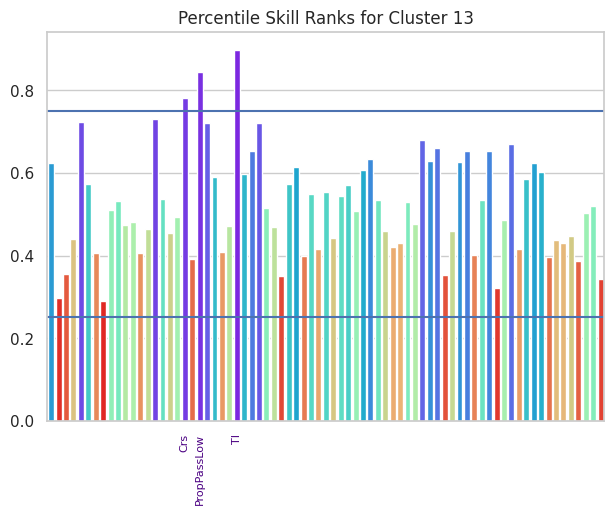

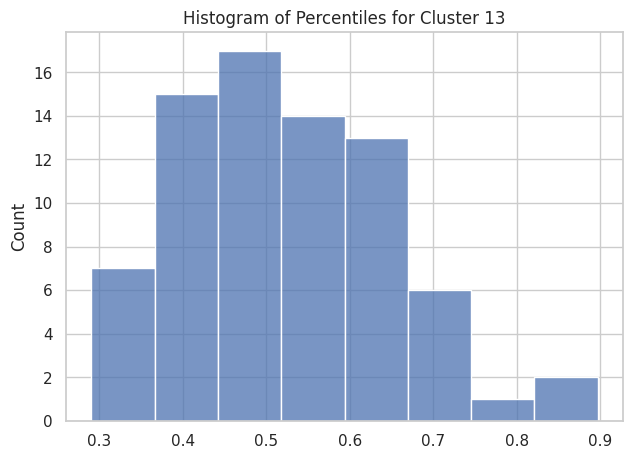

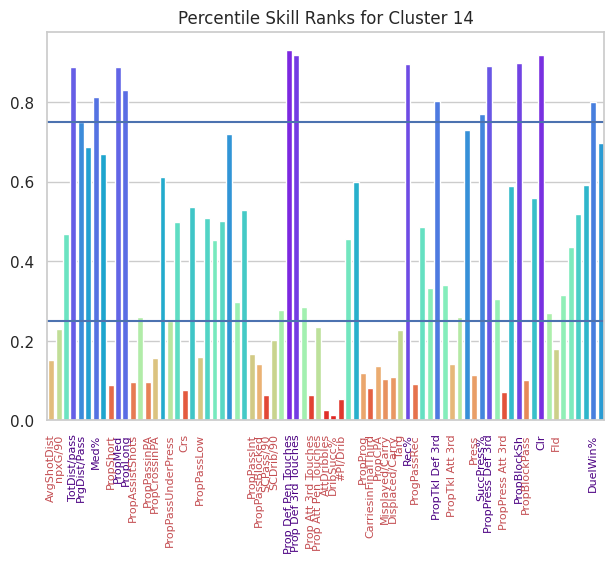

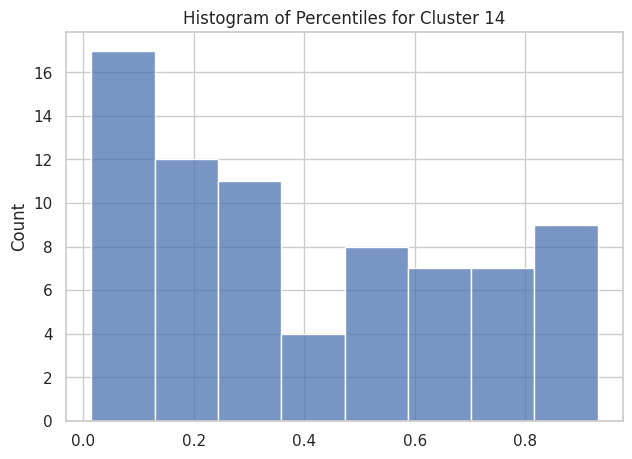

In [305]:
for cluster_num in set(clusters):
    playstyle_plots(cluster_num, cluster_avg, 0.75, 0.3)

#### Creating final dataframe

In [324]:

# First, get df of player data, and add columns we want. 
data = pd.read_csv("../data/processed/sb_individual.csv")
player_data =data[["Player", "League", "Squad", "Pos"]]
player_data["Player Type"] = cluster_data["Cluster"]
player_data[["90s", "Gls/90", "Ast"]] =data[["90s", "Gls/90", "Ast"]]
player_data[["onxG", "onxGA"]] = round(data[["onxG", "onxGA"]],2)

# '90s' is proportion of eligible 90s played. Transform into available minutes played (as %)

# Use nearest neighbors to find umap co-ordinates closest to mean for each cluster

### I forgot what I was doing here
#################
# player_idx = []
# clusters = range(len(clust_mean))
# for cluster in clusters:
#     nn = nearest_neighbors(find_means,
#                                 n_neighbors = 2,
#                                 metric="euclidean",
#                                 metric_kwds=None,
#                                 angular=False,
#                                 random_state=None
#                         )
#     idx = len(umap_data)+cluster # Cluster number we're finding
#     neighbor_idx = nn[0][idx][1] # Find index of player closest to the centre of that cluster

#     player_idx.append(neighbor_idx)
####
# Convert to dictionary for easy accessing
# idx_cluster_dict = dict(idx_cluster)


player_data.loc[:,'90s'] = player_data.loc[:,'90s'].apply(lambda x: round(x*100, 1))
player_data.rename(columns = {'90s': 'Min Pld (%)'}, inplace=True)

# Get regular goal/assist stats (multiply their per 90 rate by games played, as found above)
player_data.loc[:, "Gls/90"] = player_data["Gls/90"]*(player_data['Min Pld (%)']/100) # Gls * games played
player_data.loc[:,"Ast"] = player_data["Ast"]*(player_data['Min Pld (%)']/100) # Gls * games played

## Find total goals from per 90 stuff (easier way could be to just get original goal/assist values...but meh)
# MLS, Bundesliga have 34 games; others have 38 
mask = ((player_data['League'] == 'Major-League-Soccer') | (player_data['League'] == 'Bundesliga'))
player_data.loc[mask, 'Gls/90'] = round(player_data['Gls/90']*34, 0)
player_data.loc[mask, 'Ast'] = round(player_data['Ast']*34, 0)
# Do it for other leagues
player_data.loc[~mask, 'Gls/90'] =round( player_data['Gls/90']*38, 0)
player_data.loc[~mask, 'Ast'] = round(player_data['Ast']*38, 0)

player_data.rename(columns={"Gls/90": 'Goals', "Ast": "Assists"}, inplace=True)
player_data[["Goals", "Assists"]].astype('int')


# cluster_centres = player_data.iloc[player_idx] # Find players who best represent that cluster

# player_data.loc[player_idx, "Player Type"]= list(clusters)

player_data.to_csv("../data/processed/display_player_data.csv")

/tmp/ipykernel_4366/4243707985.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data["Player Type"] = cluster_data["Cluster"]
/tmp/ipykernel_4366/4243707985.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data[["90s", "Gls/90", "Ast"]] =data[["90s", "Gls/90", "Ast"]]
/tmp/ipykernel_4366/4243707985.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [315]:
data = pd.read_csv("../data/processed/sb_individual.csv")
player_data =data[["Player", "League", "Squad", "Pos", "90s", "Gls/90", "Ast"]]
player_data["Player Type"] = cluster_data["Cluster"]
player_data[["onxG", "onxGA"]] = round(data[["onxG", "onxGA"]],2)
player_data

/tmp/ipykernel_4366/2887286814.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data["Player Type"] = cluster_data["Cluster"]
/tmp/ipykernel_4366/2887286814.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data[["90s", "Gls/90", "Ast"]] =data[["90s", "Gls/90", "Ast"]]
/tmp/ipykernel_4366/2887286814.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,Player,League,Squad,Pos,90s,Gls/90,Ast,Player Type,onxG,onxGA
0,Marcos Acuña,La-Liga,Sevilla,DF,0.660526,0.039841,0.119522,3.0,1.09,0.77
1,Martin Agirregabiria,La-Liga,Alavés,DF,0.473684,0.000000,0.055556,3.0,0.98,1.01
2,Joseph Aidoo,La-Liga,Celta Vigo,DF,0.771053,0.000000,0.000000,7.0,1.01,0.95
3,Carlos Akapo,La-Liga,Cádiz,DF,0.539474,0.000000,0.000000,3.0,0.95,0.98
4,David Alaba,La-Liga,Real Madrid,DF,0.773684,0.068027,0.102041,7.0,0.94,0.89
...,...,...,...,...,...,...,...,...,...,...
2162,Zeca,Major-League-Soccer,Houston Dynamo,DF,0.370588,0.000000,0.079365,12.0,0.97,1.01
2163,Lucas Zelarayán,Major-League-Soccer,Columbus Crew,MF,0.755882,0.389105,0.272374,11.0,1.09,1.10
2164,Walker Zimmerman,Major-League-Soccer,Nashville,DF,0.823529,0.142857,0.035714,1.0,1.03,1.00
2165,Dario Župarić,Major-League-Soccer,Portland Timbers,DF,0.717647,0.000000,0.000000,13.0,1.10,1.04


In [ ]:
# Now, need to see what these roles mean...

# Need to group by clusters

# Show where player ranks (as percentile) for each statistic and create dataframe with that stuff added.
cluster_centres = data.iloc[centre_idx, 8:].rank(pct=True) 
# Drop stats that didn't contribute (mainly goal/assist stats)
cluster_centres.drop(columns = ['Gls/90', 'G/Sh', 'G/SoT', 'np:G-xG', 'Ast',
          'xA', 'A-xA',  'GCPass/90', 'GCDrib/90', 'onG', 'onGA', '+/-',
           'On-Off', 'onxG', 'onxGA', 'xG+/-', 'onG-xG', 'onGA-xGA', 'G-xG+/-'], inplace=True)




In [ ]:
neighbors = 15
player_name = 'Hugo Magnetti'

idx = player_data[player_data['Player'] == player_name].index[0]
# Identify players who are most similar to a given player:

neighbors = nearest_neighbors(umap_data,
                            n_neighbors = neighbors,
                            metric="euclidean",
                            metric_kwds=None,
                            angular=False,
                            random_state=None
                    )
# If player has changed leagues or teams, they'll be listed twice. Check for that...
# If more than one index, need to choose one

neighbor_idx = neighbors[0][idx] # Find index of player closest to the centre of that cluster
similar_players = player_data.iloc[neighbor_idx, :]
similar_players 


In [ ]:
player_data.iloc[2167, :]

In [ ]:
neighbor_idx = knn.kneighbors(pca_data[idx], return_distance=False)

# Here, we can see similar players for both instances of an individual
similar_players1 = player_data.iloc[neighbor_idx[0], :]
similar_players1 

In [ ]:
similar_players2 = player_data.iloc[neighbor_idx[1], :]
similar_players2

In [ ]:
pca_cols = [f'PCA_{comp+1}' for comp in range(pca_compon) ]
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
player_df = pd.DataFrame(pca_data, columns=pca_cols)
player_df['player'] = player_data['Player']

pca = PCA(n_components=9)
components = pca.fit_transform(pca_data)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    player_df, x='PCA_1', y='PCA_2', z='PCA_3', color=cluster_labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}, 
    hover_name = 'player'
)
fig.show()

Try affinity propagtion?


In [ ]:
from sklearn.cluster import AffinityPropagation



Or UMAP?

In [ ]:
import umap
import hdbscan


In [ ]:
clusterable_embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=10,
    random_state=42,
).fit_transform(df_trans)

In [ ]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(df_trans)
# plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=mnist.target.astype(int), s=0.1, cmap='Spectral')

In [ ]:
hdb_labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=20,
).fit_predict(clusterable_embedding)

In [ ]:
print(len(standard_embedding))

In [ ]:
clustered = (hdb_labels >= 0)
plt.scatter(standard_embedding[~clustered, 0],
            standard_embedding[~clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(standard_embedding[clustered, 0],
            standard_embedding[clustered, 1],
            c=hdb_labels[clustered],
            s=0.1,
            cmap='Spectral')
plt.show()

In [ ]:
np.sum(clustered) / df_trans.shape[0]


In [ ]:

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(hdb_labels)) - (1 if -1 in hdb_labels else 0)
n_noise_ = list(hdb_labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

print(f"The best silhouette_score is : 1; the best Davies-Bouldin score is : 0; a good Calinski-Harabsz score is 1000.")

silhouette_avg = silhouette_score(df_trans, hdb_labels)

db_score = davies_bouldin_score(df_trans, hdb_labels)

ch_score = calinski_harabasz_score(df_trans, hdb_labels)

print(f"The average silhouette_score is : {silhouette_avg:.2f}; the Davies-Bouldin score is : {db_score:.2f}; the Calinski-Harabsz score is {ch_score:.2f}.")


In [ ]:
from umap.umap_ import nearest_neighbors
# Identify players who are most similar to a given player:
# knn = NearestNeighbors(n_neighbors=6)
kneighbors = nearest_neighbors(standard_embedding,
                              n_neighbors = 10,
                              metric="minkowski",
                              metric_kwds=None,
                              angular=False,
                              random_state=None)


idx = player_data[player_data['Player'] == player_name].index
# If player has changed leagues or teams, they'll be listed twice. Check for that...
# If more than one index, need to choose one
neighbor_idx = kneighbors[0][idx]

# Here, we can see similar players for both instances of an individual
similar_players1 = player_data.iloc[neighbor_idx[0], :]
similar_players1 

In [ ]:
hdb_labels

In [ ]:
print(kneighbors[0])

In [ ]:
idx

In [ ]:

player_name = 'Andrea Belotti'
idx = player_data[player_data['Player'] == player_name].index
# If player has changed leagues or teams, they'll be listed twice. Check for that...
# If more than one index, need to choose one
neighbor_idx = kneighbors[0][idx]

# Here, we can see similar players for both instances of an individual
similar_players1 = player_data.iloc[neighbor_idx[0], :]
similar_players1 

Try Gaussian mixture with UMAP


In [ ]:
gm = GaussianMixture(n_components = 14, random_state=42)
gm_labels=gm.fit_predict(clusterable_embedding)


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(gm_labels)) - (1 if -1 in gm_labels else 0)
n_noise_ = list(gm_labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

print(f"The best silhouette_score is : 1; the best Davies-Bouldin score is : 0; a good Calinski-Harabsz score is 1000.")

silhouette_avg = silhouette_score(df_trans, gm_labels)

db_score = davies_bouldin_score(df_trans, gm_labels)

ch_score = calinski_harabasz_score(df_trans, gm_labels)

print(f"The average silhouette_score is : {silhouette_avg:.2f}; the Davies-Bouldin score is : {db_score:.2f}; the Calinski-Harabsz score is {ch_score:.2f}.")


In [ ]:
n_components = np.arange(1, 30)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(clusterable_embedding) for n in n_components]
plt.plot(n_components, [m.bic(clusterable_embedding) for m in models], label='BIC')
plt.plot(n_components, [m.aic(clusterable_embedding) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.show()

In [ ]:

# Identify players who are most similar to a given player:
knn = NearestNeighbors(n_neighbors=6)
kneighbors = nearest_neighbors.fit(standard_embedding)


idx = player_data[player_data['Player'] == player_name].index
# If player has changed leagues or teams, they'll be listed twice. Check for that...
# If more than one index, need to choose one
neighbor_idx = kneighbors(standard_embedding[idx], return_distance=False)

# Here, we can see similar players for both instances of an individual
similar_players1 = player_data.iloc[neighbor_idx[0], :]
similar_players1 